In [ ]:
import os
from PIL import Image

def remove_bad_images(root):
    removed = []
    for cls in os.listdir(root):
        cpath = os.path.join(root, cls)
        if not os.path.isdir(cpath):
            continue

        for f in os.listdir(cpath):
            fpath = os.path.join(cpath, f)

            # 이미지 확장자 체크
            if not f.lower().endswith((".jpg", ".jpeg", ".png", ".bmp", ".gif")):
                removed.append(fpath)
                os.remove(fpath)
                continue

            # 파일이 실제 이미지인지 체크
            try:
                img = Image.open(fpath)
                img.verify()   # 깨진 파일 검사
            except Exception:
                removed.append(fpath)
                os.remove(fpath)

    return removed

print("🚀 Scanning train...")
bad_train = remove_bad_images(TRAIN_DIR)
print("Removed:", bad_train)

print("🚀 Scanning val...")
bad_val = remove_bad_images(VAL_DIR)
print("Removed:", bad_val)


🚀 Scanning train...
Removed: []
🚀 Scanning val...
Removed: []


In [ ]:
import tensorflow as tf
import os

def find_corrupted_images(root):
    bad_files = []
    for cls in os.listdir(root):
        cpath = os.path.join(root, cls)
        if not os.path.isdir(cpath):
            continue

        for fname in os.listdir(cpath):
            fpath = os.path.join(cpath, fname)

            ext = fname.lower().split(".")[-1]
            if ext not in ["jpg", "jpeg", "png", "bmp", "gif"]:
                bad_files.append(fpath)
                continue

            try:
                img = tf.io.read_file(fpath)
                _ = tf.image.decode_image(img, expand_animations=False)
            except Exception as e:
                print("❌ TF decode failed:", fpath)
                bad_files.append(fpath)

    return bad_files

print("🔎 Checking TRAIN images...")
bad_train_tf = find_corrupted_images(TRAIN_DIR)
print("\n🚨 TRAIN corrupted TF images:", bad_train_tf)

print("\n🔎 Checking VAL images...")
bad_val_tf = find_corrupted_images(VAL_DIR)
print("\n🚨 VAL corrupted TF images:", bad_val_tf)


🔎 Checking TRAIN images...

🚨 TRAIN corrupted TF images: []

🔎 Checking VAL images...

🚨 VAL corrupted TF images: []


In [ ]:
import os

for f in bad_train_tf + bad_val_tf:
    if os.path.exists(f):
        os.remove(f)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
DATASET_ROOT: /content/drive/MyDrive/ACDT AI Device/food_dataset
TRAIN_DIR   : /content/drive/MyDrive/ACDT AI Device/food_dataset/train
VAL_DIR     : /content/drive/MyDrive/ACDT AI Device/food_dataset/val
RWTS_DIR    : /content/drive/MyDrive/ACDT AI Device/food_dataset/rwts

=== Train counts ===
Beef Bone Soup: 640
Doenjang Stew: 794
Fried Chicken: 795
Fried Egg: 640
Gimbap: 640
Honey Rice Cake: 640
Inari Sushi: 640
Jjajangmyeon: 788
Jjamppong: 795
Jokbal: 640
Kalguksu: 795
Kimchi Fried Rice: 639
Kimchi Stew: 796
Mul-naengmyeon: 635
Napa Cabbage Kimchi: 640
Nurungji: 795
Pizza: 639
Pumpkin Porridge: 640
Quail Egg Soy-braise: 640
Ramen: 792
Samgyeopsal: 790
Seaweed Soup: 639
Soy-braised Black Beans: 640
Soy-braised Lotus Root: 640
Stir-fried Zucchini: 640
Sundae: 640
Sweet Rice Punch: 641
Tteokbokki: 637
Yakgwa: 641
Yangnyeom Chicken: 794
Yukhoe: 640

=== Val 

Model: "food_classifier_mobilenet"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ image_input (InputLayer)        │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_160            │ (None, 5, 5, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 31)             │        39,711 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,297,695 (8.77 MB)

 Trainable params: 39,711 (155.12 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/10
1336/1336 ━━━━━━━━━━━━━━━━━━━━ 0s 519ms/step - accuracy: 0.5175 - loss: 1.7168
Epoch 1: val_accuracy improved from -inf to 0.75952, saving model to /content/drive/MyDrive/ACDT AI Device/food_dataset/models_light/food_classifier_best.keras
1336/1336 ━━━━━━━━━━━━━━━━━━━━ 944s 702ms/step - accuracy: 0.5175 - loss: 1.7165 - val_accuracy: 0.7595 - val_loss: 0.8024 - learning_rate: 0.0010
Epoch 2/10
1336/1336 ━━━━━━━━━━━━━━━━━━━━ 0s 511ms/step - accuracy: 0.7310 - loss: 0.8757
Epoch 2: val_accuracy improved from 0.75952 to 0.76800, saving model to /content/drive/MyDrive/ACDT AI Device/food_dataset/models_light/food_classifier_best.keras
1336/1336 ━━━━━━━━━━━━━━━━━━━━ 979s 700ms/step - accuracy: 0.7310 - loss: 0.8757 - val_accuracy: 0.7680 - val_loss: 0.7716 - learning_rate: 0.0010
Epoch 3/10
1336/1336 ━━━━━━━━━━━━━━━━━━━━ 0s 510ms/step - accuracy: 0.7506 - loss: 0.8032
Epoch 3: val_accuracy improved from 0.76800 to 0.77250, saving model to /content/drive/MyDrive/ACDT AI Device/foo

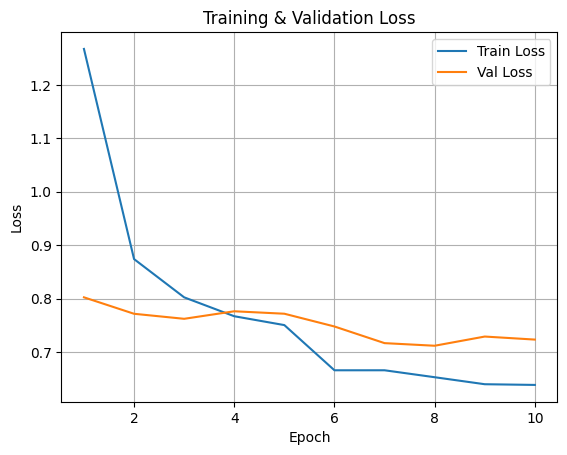

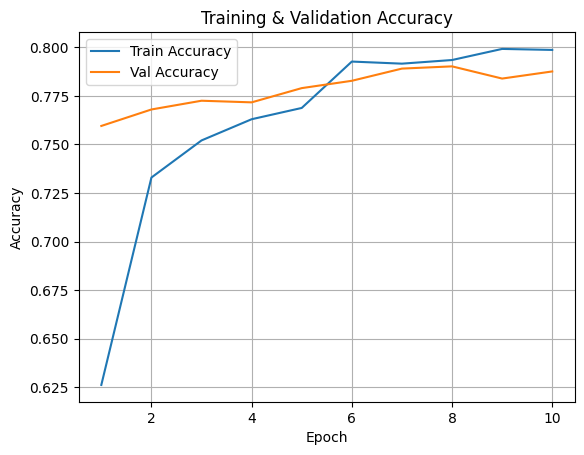


[FINAL] Val Loss: 0.7118, Val Accuracy: 0.7902

Confusion Matrix:
 [[251  12   0   2   0   0   0   0   7   0  54   0   3  13   0  11   0   0
    0   1   1   0   1   0   1   1   4   0   0   0   0]
 [  2 141   0   0   0   1   0   0   5   0   9   1  18   4   0   1   0   0
    1   9   0   1   0   0   3   1   0   2   0   0   0]
 [  0   0 148   1   0   0   1   0   0   8   0   7   1   0   3   4   0   0
    0   0   6   0   0   0   0   1   0   2   3  14   0]
 [  1   2   0 239   3   5   3   3   0   0   8  51   0  10   1  17   0   5
    1   3   2   0   0   0   1   1   2   2   1   0   1]
 [  0   0   0   0 274   5  16   1   0   1   4   7   0   1   1   0   0   0
    1   1   9   1   2   0   2  17   1   4   2   9   0]
 [  0   0   0   2   0 337   6   0   0   0   1   0   0   2   0   0   0   0
    8   0   0   0   1   0   0   0   1   0   3   0   0]
 [  0   0   2   3   4   5 275   0   0   2   5   6   0   6   1   4   4   0
    3   3   7   0   0   1   3   7   1   6  11   0   1]
 [  0   0   0   2   0   0   0

In [ ]:
##############################################
# 0. Google Drive 마운트
##############################################
from google.colab import drive
drive.mount('/content/drive')

##############################################
# 1. 기본 경로/폴더 체크
##############################################
import os

DATASET_ROOT = "/content/drive/MyDrive/ACDT AI Device/food_dataset"  # 여기만 필요하면 수정
TRAIN_DIR = os.path.join(DATASET_ROOT, "train")
VAL_DIR   = os.path.join(DATASET_ROOT, "val")
RWTS_DIR  = os.path.join(DATASET_ROOT, "rwts")

print("DATASET_ROOT:", DATASET_ROOT)
print("TRAIN_DIR   :", TRAIN_DIR)
print("VAL_DIR     :", VAL_DIR)
print("RWTS_DIR    :", RWTS_DIR)

# 폴더 존재 여부 확인
for path in [DATASET_ROOT, TRAIN_DIR, VAL_DIR]:
    if not os.path.isdir(path):
        raise FileNotFoundError(f"❌ 폴더를 찾을 수 없습니다: {path}\n"
                                "Google Drive에서 실제 폴더 이름/경로를 확인해 주세요.")

# 클래스별 jpg 개수 확인 (optional)
def count_jpg(root):
    info = {}
    for cls in sorted(os.listdir(root)):
        cpath = os.path.join(root, cls)
        if not os.path.isdir(cpath):
            continue
        num = len([f for f in os.listdir(cpath) if f.lower().endswith(".jpg")])
        info[cls] = num
    return info

print("\n=== Train counts ===")
for k, v in count_jpg(TRAIN_DIR).items():
    print(f"{k}: {v}")

print("\n=== Val counts ===")
for k, v in count_jpg(VAL_DIR).items():
    print(f"{k}: {v}")


##############################################
# 2. TensorFlow / Dataset 로드
##############################################
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print("\nTensorFlow version:", tf.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))

IMG_SIZE = (160, 160)   # 메모리 줄이려고 160x160 사용
BATCH_SIZE = 16         # 배치 줄임
SEED = 42

train_ds = tf.keras.utils.image_dataset_from_directory(
    TRAIN_DIR,
    labels="inferred",
    label_mode="int",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True,          # 여기서 이미 셔플해 줌
    seed=SEED
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    VAL_DIR,
    labels="inferred",
    label_mode="int",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False,
    seed=SEED
)

class_names = train_ds.class_names
num_classes = len(class_names)
print("\nClass names:", class_names)
print("Num classes:", num_classes)

##############################################
# 3. 데이터 전처리 & 증강 (cache 없음!)
##############################################
AUTOTUNE = tf.data.AUTOTUNE

data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.RandomFlip("horizontal"),
        tf.keras.layers.RandomRotation(0.05),
        tf.keras.layers.RandomZoom(0.1),
        tf.keras.layers.RandomContrast(0.1),
    ],
    name="data_augmentation"
)

def prepare_dataset(ds, augment=False):
    # 0~1 정규화
    ds = ds.map(
        lambda x, y: (tf.cast(x, tf.float32) / 255.0, y),
        num_parallel_calls=AUTOTUNE
    )
    # 증강은 train만
    if augment:
        ds = ds.map(
            lambda x, y: (data_augmentation(x, training=True), y),
            num_parallel_calls=AUTOTUNE
        )
    # cache() 제외 → 메모리 절약
    ds = ds.prefetch(AUTOTUNE)
    return ds

train_ds_prep = prepare_dataset(train_ds, augment=True)
val_ds_prep   = prepare_dataset(val_ds, augment=False)


##############################################
# 4. 모델 구성 (가벼운 MobileNetV2 사용)
##############################################
from tensorflow.keras import layers, models

base_model = tf.keras.applications.MobileNetV2(
    include_top=False,
    weights="imagenet",
    input_shape=IMG_SIZE + (3,)
)

base_model.trainable = False   # 1단계는 feature extractor로만 사용

inputs = layers.Input(shape=IMG_SIZE + (3,), name="image_input")
x = inputs
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(num_classes, activation="softmax", name="predictions")(x)

model = models.Model(inputs, outputs, name="food_classifier_mobilenet")

model.summary()


##############################################
# 5. Compile
##############################################
initial_lr = 1e-3

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=initial_lr),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)


##############################################
# 6. Callbacks 설정
##############################################
checkpoint_path = os.path.join(DATASET_ROOT, "models_light")
os.makedirs(checkpoint_path, exist_ok=True)

ckpt_cb = tf.keras.callbacks.ModelCheckpoint(
    filepath=os.path.join(checkpoint_path, "food_classifier_best.keras"),
    monitor="val_accuracy",
    save_best_only=True,
    mode="max",
    verbose=1
)

early_cb = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=4,
    restore_best_weights=True,
    verbose=1
)

lr_cb = tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.5,
    patience=2,
    min_lr=1e-6,
    verbose=1
)


##############################################
# 7. 학습 (한 번만, Fine-tuning은 나중에)
##############################################
EPOCHS = 10   # 필요하면 5~8 정도로 줄여도 됨

history = model.fit(
    train_ds_prep,
    validation_data=val_ds_prep,
    epochs=EPOCHS,
    callbacks=[ckpt_cb, early_cb, lr_cb]
)


##############################################
# 8. 그래프 그리기
##############################################
epochs_range = range(1, len(history.history["loss"]) + 1)

plt.figure()
plt.plot(epochs_range, history.history["loss"], label="Train Loss")
plt.plot(epochs_range, history.history["val_loss"], label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Training & Validation Loss")
plt.grid(True)
plt.show()

plt.figure()
plt.plot(epochs_range, history.history["accuracy"], label="Train Accuracy")
plt.plot(epochs_range, history.history["val_accuracy"], label="Val Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training & Validation Accuracy")
plt.grid(True)
plt.show()


##############################################
# 9. Validation 성능 평가
##############################################
val_loss, val_acc = model.evaluate(val_ds_prep, verbose=0)
print(f"\n[FINAL] Val Loss: {val_loss:.4f}, Val Accuracy: {val_acc:.4f}")


##############################################
# 10. Confusion Matrix & Classification Report (데이터가 엄청 크면 생략해도 됨)
##############################################
from sklearn.metrics import confusion_matrix, classification_report

y_true = []
y_pred = []

for batch_imgs, batch_labels in val_ds_prep:
    preds = model.predict(batch_imgs, verbose=0)
    y_true.extend(batch_labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

y_true = np.array(y_true)
y_pred = np.array(y_pred)

cm = confusion_matrix(y_true, y_pred)
print("\nConfusion Matrix:\n", cm)

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))


##############################################
# 11. 모델 & label_map 저장
##############################################
final_model_path = os.path.join(checkpoint_path, "food_classifier_final.keras")
model.save(final_model_path)
print("\n✔ Saved final model to:", final_model_path)

import json
label_map = {i: name for i, name in enumerate(class_names)}
label_path = os.path.join(checkpoint_path, "label_map.json")
with open(label_path, "w") as f:
    json.dump(label_map, f, indent=2, ensure_ascii=False)
print("✔ Saved label map to:", label_path)


##############################################
# 12. 단일 이미지 Top-k 예측 함수
##############################################
def predict_image(img_path, k=3):
    img = tf.keras.utils.load_img(img_path, target_size=IMG_SIZE)
    arr = tf.keras.utils.img_to_array(img)
    arr = tf.expand_dims(arr, 0)   # (1, H, W, 3)
    arr = arr / 255.0

    preds = model.predict(arr, verbose=0)[0]  # (num_classes,)
    top_k_idx = preds.argsort()[-k:][::-1]

    print(f"\n[Prediction for] {img_path}")
    for i in top_k_idx:
        print(f"  {class_names[i]}: {preds[i]:.4f}")

    max_prob = preds[top_k_idx[0]]
    if max_prob < 0.6:
        print("\n⚠ 모델 확신도 낮음 (max prob < 0.6)")
        print("👉 다른 각도/배경/밝기로 다시 촬영해 보세요.")


# 예시: rwts 폴더에서 아무 이미지 하나 테스트 (있으면)
if os.path.isdir(RWTS_DIR):
    test_example = None
    for cls in os.listdir(RWTS_DIR):
        cpath = os.path.join(RWTS_DIR, cls)
        if not os.path.isdir(cpath):
            continue
        files = [f for f in os.listdir(cpath) if f.lower().endswith(".jpg")]
        if files:
            test_example = os.path.join(cpath, files[0])
            break

    if test_example:
        predict_image(test_example, k=3)
    else:
        print("\n(RWTS 폴더 안에 jpg 이미지가 없어서 예측 데모는 건너뜀)")
else:
    print("\n(RWTS 폴더가 없거나 비어 있음)")


RWTS Loss and Accuracy

In [ ]:
RWTS_DIR = "/content/drive/MyDrive/ACDT AI Device/food_dataset/rwts"

rwts_ds = tf.keras.utils.image_dataset_from_directory(
    RWTS_DIR,
    labels="inferred",
    label_mode="int",
    image_size=IMG_SIZE,
    batch_size=16,
    shuffle=False
)

rwts_ds_prep = rwts_ds.map(
    lambda x, y: (tf.cast(x, tf.float32) / 255.0, y)
).prefetch(tf.data.AUTOTUNE)

rwts_loss, rwts_acc = model.evaluate(rwts_ds_prep)
print("RWTS Loss:", rwts_loss)
print("RWTS Accuracy:", rwts_acc)


Found 246 files belonging to 31 classes.
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 381ms/step - accuracy: 0.8796 - loss: 0.4379
RWTS Loss: 0.5518862009048462
RWTS Accuracy: 0.8536585569381714


Confusion Matrix

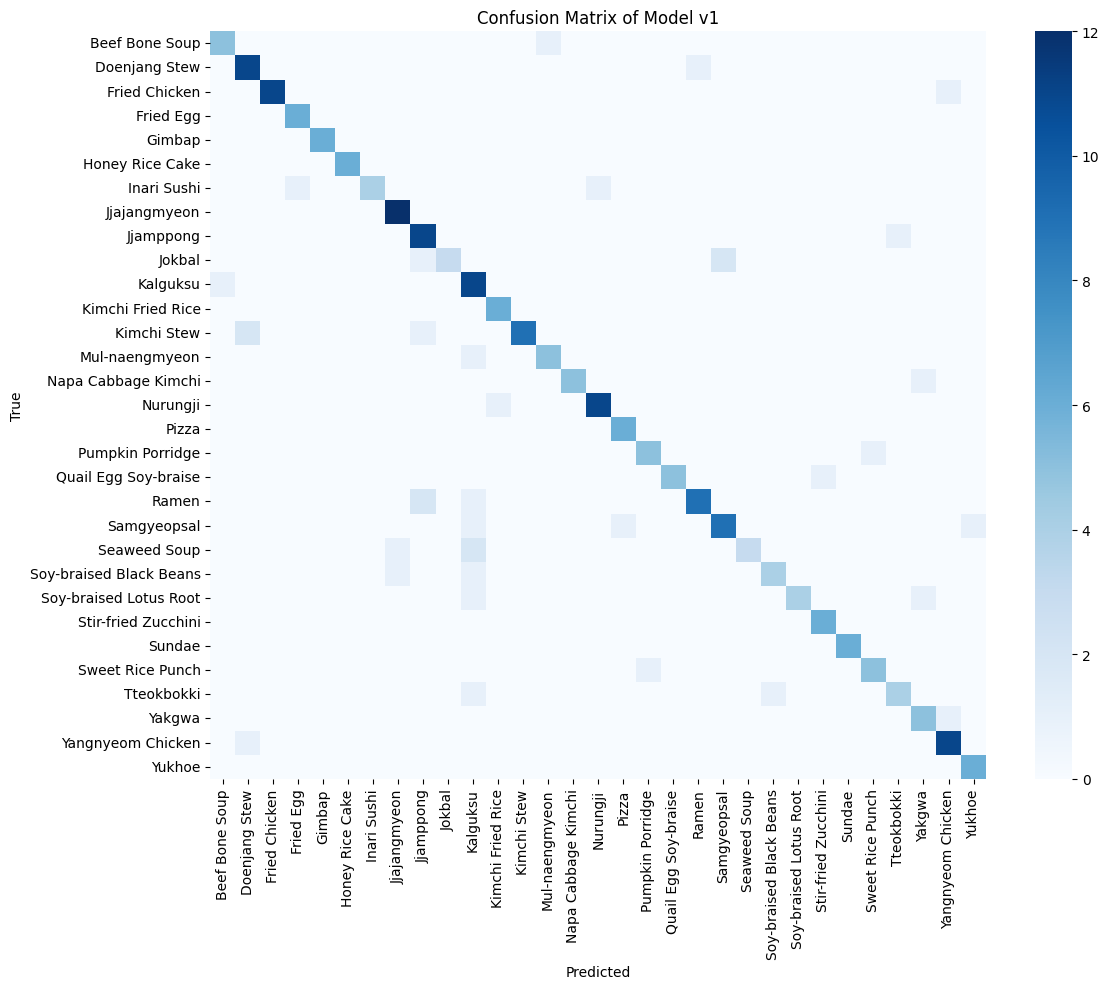

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred, labels=range(len(class_names)))

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=False, cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix of Model v1")
plt.tight_layout()
plt.show()


Error Board

In [ ]:
import os
import tensorflow as tf

def find_and_remove_corrupted_tf(root):
    bad_files = []

    for cls in os.listdir(root):
        cpath = os.path.join(root, cls)
        if not os.path.isdir(cpath):
            continue

        for fname in os.listdir(cpath):
            fpath = os.path.join(cpath, fname)

            # 확장자 체크
            if not fname.lower().endswith((".jpg", ".jpeg", ".png", ".bmp")):
                bad_files.append(fpath)
                print("❌ 확장자 문제 → 삭제:", fpath)
                os.remove(fpath)
                continue

            try:
                img_bytes = tf.io.read_file(fpath)
                img = tf.image.decode_image(img_bytes, channels=3)
                _ = img.shape  # 텐서 shape 확인
            except Exception as e:
                print("❌ TensorFlow 디코딩 실패 → 삭제:", fpath)
                bad_files.append(fpath)
                os.remove(fpath)

    return bad_files


print("🔎 RWTS 폴더 검사 중...")
bad_rwts = find_and_remove_corrupted_tf(RWTS_DIR)
print("🚨 RWTS에서 제거된 문제 파일:", bad_rwts)


🔎 RWTS 폴더 검사 중...
🚨 RWTS에서 제거된 문제 파일: []


In [ ]:
# [핵심] 이 코드를 for문 시작하기 전에 꼭 넣어주세요!
# rwts_ds는 전처리(map)하기 전, image_dataset_from_directory로 만든 원본 변수여야 합니다.
rwts_file_paths = rwts_ds.file_paths

# -------------------------------------------------------------
# 아래는 작성자님 코드 그대로 (이제 에러 안 남)
# -------------------------------------------------------------
import numpy as np
import pandas as pd
import tensorflow as tf

y_true = []
y_pred = []
y_prob = []

print("오분류 분석 시작...")

# 데이터셋에서 예측 수행
for batch_imgs, batch_labels in rwts_ds_prep:
    preds = model.predict(batch_imgs, verbose=0)
    y_true.extend(batch_labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))
    y_prob.extend(np.max(preds, axis=1))

y_true = np.array(y_true)
y_pred = np.array(y_pred)
y_prob = np.array(y_prob)

# 틀린 것 찾기
mis_idx = np.where(y_true != y_pred)[0]
print(f"총 {len(y_true)}장 중 오분류 개수: {len(mis_idx)}개")

error_records = []

# 20개만 뽑아서 DataFrame 만들기
for i, idx in enumerate(mis_idx[:20], start=1):
    error_records.append({
        "ID": i,
        "true_label": class_names[y_true[idx]],
        "pred_label": class_names[y_pred[idx]],
        "confidence": float(y_prob[idx]),
        "file_path": rwts_file_paths[idx], # 이제 이 변수가 정의되어서 정상 작동함!
        "hypothesized_cause": "",
        "proposed_fix": ""
    })

error_df = pd.DataFrame(error_records)
error_df

오분류 분석 시작...
총 246장 중 오분류 개수: 36개


,ID,true_label,pred_label,confidence,file_path,hypothesized_cause,proposed_fix
0,1,Beef Bone Soup,Mul-naengmyeon,0.553984,/content/drive/MyDrive/ACDT AI Device/food_dat...,,
1,2,Doenjang Stew,Ramen,0.602467,/content/drive/MyDrive/ACDT AI Device/food_dat...,,
2,3,Fried Chicken,Yangnyeom Chicken,0.432282,/content/drive/MyDrive/ACDT AI Device/food_dat...,,
3,4,Inari Sushi,Fried Egg,0.452566,/content/drive/MyDrive/ACDT AI Device/food_dat...,,
4,5,Inari Sushi,Nurungji,0.928411,/content/drive/MyDrive/ACDT AI Device/food_dat...,,
5,6,Jjamppong,Tteokbokki,0.615478,/content/drive/MyDrive/ACDT AI Device/food_dat...,,
6,7,Jokbal,Jjamppong,0.425650,/content/drive/MyDrive/ACDT AI Device/food_dat...,,
7,8,Jokbal,Samgyeopsal,0.785106,/content/drive/MyDrive/ACDT AI Device/food_dat...,,
8,9,Jokbal,Samgyeopsal,0.699236,/content/drive/MyDrive/ACDT AI Device/food_dat...,,
9,10,Kalguksu,Beef Bone Soup,0.981336,/content/drive/MyDrive/ACDT AI Device/food_dat...,,


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

# RWTS 예측(아까 값 재사용)
y_true = []
y_pred = []
y_prob = []

for batch_imgs, batch_labels in rwts_ds_prep:
    preds = model.predict(batch_imgs, verbose=0)
    y_true.extend(batch_labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))
    y_prob.extend(np.max(preds, axis=1))

y_true = np.array(y_true)
y_pred = np.array(y_pred)
y_prob = np.array(y_prob)

mis_idx = np.where(y_true != y_pred)[0]
print("오분류 개수:", len(mis_idx))

error_records = []

for i, idx in enumerate(mis_idx[:20], start=1):  # 20개까지 사용
    error_records.append({
        "ID": i,
        "true_label": class_names[y_true[idx]],
        "pred_label": class_names[y_pred[idx]],
        "confidence": float(y_prob[idx]),
        "file_path": rwts_file_paths[idx],
        "hypothesized_cause": "",
        "proposed_fix": ""
    })

error_df = pd.DataFrame(error_records)
error_df


오분류 개수: 36


,ID,true_label,pred_label,confidence,file_path,hypothesized_cause,proposed_fix
0,1,Beef Bone Soup,Mul-naengmyeon,0.553984,/content/drive/MyDrive/ACDT AI Device/food_dat...,,
1,2,Doenjang Stew,Ramen,0.602467,/content/drive/MyDrive/ACDT AI Device/food_dat...,,
2,3,Fried Chicken,Yangnyeom Chicken,0.432282,/content/drive/MyDrive/ACDT AI Device/food_dat...,,
3,4,Inari Sushi,Fried Egg,0.452566,/content/drive/MyDrive/ACDT AI Device/food_dat...,,
4,5,Inari Sushi,Nurungji,0.928411,/content/drive/MyDrive/ACDT AI Device/food_dat...,,
5,6,Jjamppong,Tteokbokki,0.615478,/content/drive/MyDrive/ACDT AI Device/food_dat...,,
6,7,Jokbal,Jjamppong,0.425650,/content/drive/MyDrive/ACDT AI Device/food_dat...,,
7,8,Jokbal,Samgyeopsal,0.785106,/content/drive/MyDrive/ACDT AI Device/food_dat...,,
8,9,Jokbal,Samgyeopsal,0.699236,/content/drive/MyDrive/ACDT AI Device/food_dat...,,
9,10,Kalguksu,Beef Bone Soup,0.981336,/content/drive/MyDrive/ACDT AI Device/food_dat...,,


In [ ]:
import numpy as np
import pandas as pd

# 파일 경로 (썸네일·표에 쓰기 위해)
rwts_file_paths = np.array(rwts_file_paths)

# RWTS 전체 예측값 모으기
y_true = []
y_pred = []
y_prob = []

for batch_imgs, batch_labels in rwts_ds_prep:
    preds = model.predict(batch_imgs, verbose=0)   # (batch, num_classes)
    y_true.extend(batch_labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))
    y_prob.extend(np.max(preds, axis=1))

y_true = np.array(y_true)
y_pred = np.array(y_pred)
y_prob = np.array(y_prob)

# 오분류 인덱스
mis_idx = np.where(y_true != y_pred)[0]
print("오분류 개수:", len(mis_idx))

# 10–20개만 뽑아서 Error Board v1 표 만들기
max_rows = 20   # 필요하면 숫자 조절
mis_idx = mis_idx[:max_rows]

records = []
for i, idx in enumerate(mis_idx, start=1):
    records.append({
        "ID": i,
        "True Label": class_names[y_true[idx]],
        "Predicted Label": class_names[y_pred[idx]],
        "Confidence": float(y_prob[idx]),
        "File Path": rwts_file_paths[idx],
        "Hypothesized Cause": "",   # 엑셀/시트에서 나중에 직접 채우기
        "Proposed Fix": ""          # 엑셀/시트에서 직접 채우기
    })

error_df = pd.DataFrame(records)
error_df  # Colab에서 표로 보임

# CSV로 저장해서 구글 시트/엑셀에서 열기
error_csv_path = "/content/error_board_v1_rwts.csv"
error_df.to_csv(error_csv_path, index=False, encoding="utf-8-sig")
print("✔ Error Board CSV 저장:", error_csv_path)


오분류 개수: 36
✔ Error Board CSV 저장: /content/error_board_v1_rwts.csv


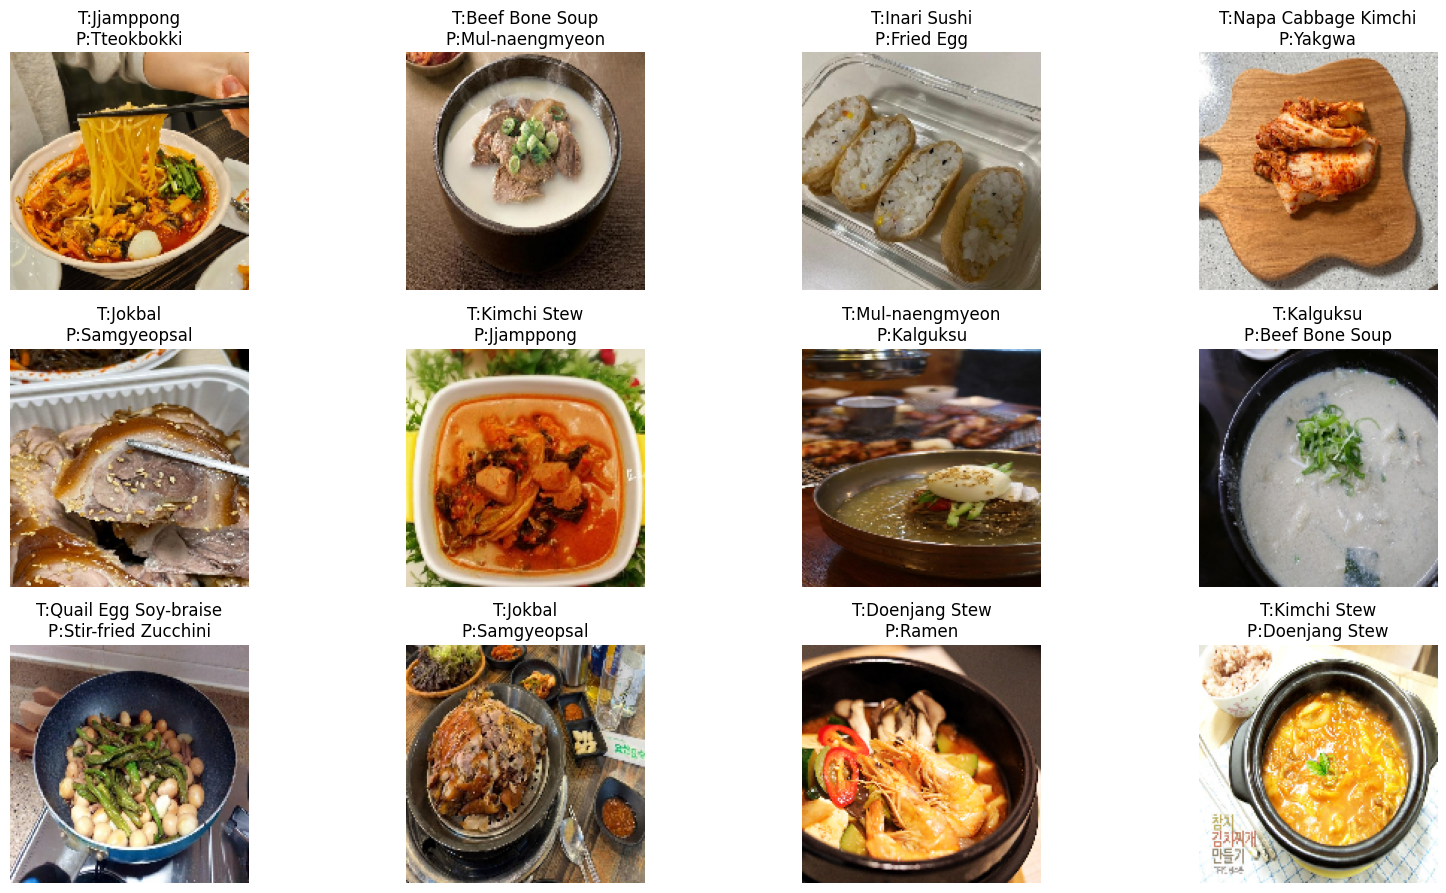

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

idx_list = mis_idx.copy()
np.random.shuffle(idx_list)  # 오분류 인덱스를 섞기

num_show = min(12, len(idx_list))
cols = 4
rows = (num_show // cols) + 1

plt.figure(figsize=(16, 12))

for i in range(num_show):
    idx = idx_list[i]
    img = tf.keras.utils.load_img(rwts_file_paths[idx], target_size=IMG_SIZE)

    plt.subplot(rows, cols, i+1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"T:{class_names[y_true[idx]]}\nP:{class_names[y_pred[idx]]}")
plt.tight_layout()
plt.show()


In [ ]:
# ---------------------------------
# (A) Drive 연결
# ---------------------------------
from google.colab import drive
drive.mount('/content/drive')

# ---------------------------------
# (B) 라이브러리 로드
# ---------------------------------
import tensorflow as tf
from tensorflow.keras.models import load_model

# ---------------------------------
# (C) 모델 불러오기
# ---------------------------------
model_path = "/content/drive/MyDrive/ACDT AI Device/food_dataset/models_light/food_classifier_final.keras"
model = load_model(model_path)

print("모델 로드 완료!")

# ---------------------------------
# (D) RWTS 평가 / 예측 테스트 / Error Board 만들기
# ---------------------------------
# 필요한 코드만 추가


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
모델 로드 완료!


top5 추출

In [ ]:
import numpy as np

def predict_top5(model, image_path, class_names):
    # 1. 이미지 전처리 (생략)
    # ...

    # 2. 모델 예측 (확률 계산)
    predictions = model.predict(img_array)
    score = predictions[0]

    # 3. Top 5 인덱스 뽑기 (여기가 핵심!)
    # argsort는 작은 순서대로 정렬하므로, 뒤집어서 큰 순서대로 5개 뽑음
    top_5_indices = score.argsort()[-5:][::-1]

    results = []
    for i in top_5_indices:
        food_name = class_names[i]
        confidence = round(100 * score[i], 2)
        results.append({"food": food_name, "confidence": confidence})

    # 결과 반환 (이걸 Thunkable로 보냄)
    return results
    # 예시: [{'food': 'Kimchi Stew', 'confidence': 92.5}, {'food': 'Doenjang Stew', 'confidence': 5.1}, ...]

In [ ]:
# 1. 라이브러리 임포트
from google.colab import drive
import tensorflow as tf
import os

# 2. 구글 드라이브 연결 (마운트)
print("🔄 구글 드라이브를 연결합니다...")
drive.mount('/content/drive')

# =========================================================
# [중요] 아래 경로를 본인의 모델 파일(.h5) 경로로 바꿔주세요!
# 예: '/content/drive/MyDrive/my_project/best_model.h5'
# =========================================================
model_path = '/content/drive/MyDrive/ACDT AI Device/food_dataset/models_light/final_food_model.h5'

# 3. 모델 불러오기
if os.path.exists(model_path):
    try:
        print(f"🔄 모델을 불러오는 중입니다... [파일: {model_path}]")
        model = tf.keras.models.load_model(model_path)
        print("✅ 모델 로딩 성공! (준비 완료)")

        # 모델 정보 살짝 확인 (입력 크기 등)
        input_shape = model.input_shape
        print(f"ℹ️ 모델 입력 크기(Input Shape): {input_shape}")

    except Exception as e:
        print(f"❌ 모델 로딩 중 오류 발생: {e}")
else:
    print(f"🚨 오류: 파일을 찾을 수 없습니다! 경로를 확인해주세요.")
    print(f"입력된 경로: {model_path}")

🔄 구글 드라이브를 연결합니다...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
🔄 모델을 불러오는 중입니다... [파일: /content/drive/MyDrive/ACDT AI Device/food_dataset/models_light/final_food_model.h5]


✅ 모델 로딩 성공! (준비 완료)
ℹ️ 모델 입력 크기(Input Shape): (None, 160, 160, 3)


In [ ]:
import os
import json
from google.colab import drive

# 1. 구글 드라이브 연결 (이미 되어있다면 생략됨)
drive.mount('/content/drive')

# =========================================================
# [저장 경로 설정] 원하는 폴더 이름으로 바꾸셔도 됩니다.
# 여기서는 내 드라이브 바로 아래에 저장하도록 설정했습니다.
# =========================================================
save_path = '/content/drive/MyDrive/ACDT_Project_Models'

# 폴더가 없으면 자동으로 만듭니다.
if not os.path.exists(save_path):
    os.makedirs(save_path)
    print(f"📂 새 폴더를 생성했습니다: {save_path}")

# ---------------------------------------------------------
# 2. 모델(.h5) 저장하기 (가장 중요!)
# ---------------------------------------------------------
model_filename = 'final_food_model.h5'
model_full_path = os.path.join(save_path, model_filename)

model.save(model_full_path)
print(f"✅ 모델 저장 완료: {model_full_path}")

# ---------------------------------------------------------
# 3. 라벨 맵(.json) 저장하기 (이름표 저장)
# ---------------------------------------------------------
# 학습할 때 썼던 class_names 리스트를 딕셔너리로 변환해 저장합니다.
# (W11 코드 위에 class_names 변수가 있어야 합니다!)

if 'class_names' in globals():
    # { "0": "떡볶이", "1": "김치찌개" ... } 형태로 변환
    label_map = {i: name for i, name in enumerate(class_names)}

    label_filename = 'label_map.json'
    label_full_path = os.path.join(save_path, label_filename)

    with open(label_full_path, 'w', encoding='utf-8') as f:
        json.dump(label_map, f, ensure_ascii=False, indent=4)

    print(f"✅ 라벨 맵 저장 완료: {label_full_path}")
else:
    print("⚠️ 경고: class_names 변수를 찾지 못해 라벨 맵을 저장하지 못했습니다.")
    print("위쪽 코드 셀을 실행해서 class_names를 정의해주세요.")

print("\n🎉 모든 저장이 끝났습니다! 구글 드라이브 폴더를 확인해보세요.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
📂 새 폴더를 생성했습니다: /content/drive/MyDrive/ACDT_Project_Models
✅ 모델 저장 완료: /content/drive/MyDrive/ACDT_Project_Models/final_food_model.h5
⚠️ 경고: class_names 변수를 찾지 못해 라벨 맵을 저장하지 못했습니다.
위쪽 코드 셀을 실행해서 class_names를 정의해주세요.

🎉 모든 저장이 끝났습니다! 구글 드라이브 폴더를 확인해보세요.


In [ ]:
import os
import random
import numpy as np
import tensorflow as tf

# RWTS 폴더 경로
RWTS_DIR = "/content/drive/MyDrive/ACDT AI Device/food_dataset/rwts"

# 이미지 전처리 + Top-5 예측 함수
IMG_SIZE = (160, 160)

def predict_top5(model, image_path, class_names):
    # 1. 이미지 로드 + 전처리
    img = tf.keras.utils.load_img(image_path, target_size=IMG_SIZE)
    img_array = tf.keras.utils.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    # 2. 모델 예측
    predictions = model.predict(img_array, verbose=0)
    score = predictions[0]

    # 3. Top-5 인덱스 뽑기
    top_5_indices = score.argsort()[-5:][::-1]

    results = []
    for i in top_5_indices:
        results.append({
            "food": class_names[i],
            "confidence": float(score[i] * 100.0)
        })

    return results

# ------------------------
# 랜덤 이미지 선택
# ------------------------
# 1) 클래스 중 랜덤 선택
cls_list = [cls for cls in os.listdir(RWTS_DIR) if os.path.isdir(os.path.join(RWTS_DIR, cls))]
rand_cls = random.choice(cls_list)

# 2) 해당 클래스 안에서 랜덤 이미지 선택
cls_path = os.path.join(RWTS_DIR, rand_cls)
img_files = [f for f in os.listdir(cls_path) if f.lower().endswith((".jpg", ".jpeg", ".png", ".bmp", ".gif"))]
rand_img = random.choice(img_files)

# 3) 전체 경로
test_img = os.path.join(cls_path, rand_img)
print("✅ 선택된 테스트 이미지:", test_img)

# ------------------------
# Top-5 예측
# ------------------------
top5_results = predict_top5(model, test_img, class_names)
print("\n🔝 Top-5 예측:")
for r in top5_results:
    print(f"{r['food']}: {r['confidence']:.2f}%")


✅ 선택된 테스트 이미지: /content/drive/MyDrive/ACDT AI Device/food_dataset/rwts/Jjajangmyeon/Img_057_0608.jpg


NameError: name 'class_names' is not defined

In [ ]:
import os
import random
import numpy as np
import tensorflow as tf

# ---------------------------------------------------------
# [수정 1] class_names 정의 (학습 데이터 폴더에서 가져오기)
# ---------------------------------------------------------
# 학습 데이터 폴더 경로 (W11 파일 내에서 사용한 train_dir 경로와 동일해야 함)
# 만약 경로가 다르다면 수정해주세요!
train_dir = '/content/drive/MyDrive/ACDT AI Device/food_dataset/train'

if os.path.exists(train_dir):
    class_names = sorted(os.listdir(train_dir))
    print(f"✅ 클래스 목록 로드 완료! (총 {len(class_names)}개)")
else:
    print("🚨 오류: 학습 데이터 폴더(train_dir)를 찾을 수 없습니다. 경로를 확인해주세요.")
    # 비상용: 만약 폴더가 없다면 빈 리스트라도 정의해야 에러가 안 남 (하지만 예측은 실패함)
    class_names = []

# ---------------------------------------------------------
# 기존 코드 시작
# ---------------------------------------------------------

# RWTS 폴더 경로 (테스트용 이미지 폴더)
RWTS_DIR = "/content/drive/MyDrive/ACDT AI Device/food_dataset/rwts"

# 이미지 전처리 + Top-5 예측 함수
IMG_SIZE = (160, 160)

def predict_top5(model, image_path, class_names):
    # 1. 이미지 로드 + 전처리
    img = tf.keras.utils.load_img(image_path, target_size=IMG_SIZE)
    img_array = tf.keras.utils.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    # 2. 모델 예측
    predictions = model.predict(img_array, verbose=0)
    score = predictions[0]

    # 3. Top-5 인덱스 뽑기
    top_5_indices = score.argsort()[-5:][::-1]

    results = []
    for i in top_5_indices:
        # 안전장치: 인덱스가 class_names 범위 내에 있는지 확인
        if i < len(class_names):
             results.append({
                "food": class_names[i],
                "confidence": float(score[i] * 100.0)
            })
        else:
             results.append({
                "food": "Unknown Index",
                "confidence": float(score[i] * 100.0)
            })

    return results

# ------------------------
# 랜덤 이미지 선택
# ------------------------
if os.path.exists(RWTS_DIR):
    # 1) 클래스 중 랜덤 선택
    cls_list = [cls for cls in os.listdir(RWTS_DIR) if os.path.isdir(os.path.join(RWTS_DIR, cls))]

    if cls_list:
        rand_cls = random.choice(cls_list)

        # 2) 해당 클래스 안에서 랜덤 이미지 선택
        cls_path = os.path.join(RWTS_DIR, rand_cls)
        img_files = [f for f in os.listdir(cls_path) if f.lower().endswith((".jpg", ".jpeg", ".png", ".bmp", ".gif"))]

        if img_files:
            rand_img = random.choice(img_files)

            # 3) 전체 경로
            test_img = os.path.join(cls_path, rand_img)
            print("✅ 선택된 테스트 이미지:", test_img)

            # ------------------------
            # Top-5 예측
            # ------------------------
            # class_names가 비어있지 않을 때만 예측 수행
            if class_names:
                top5_results = predict_top5(model, test_img, class_names)
                print("\n🔝 Top-5 예측:")
                for r in top5_results:
                    print(f"{r['food']}: {r['confidence']:.2f}%")
            else:
                 print("🚨 오류: class_names가 정의되지 않아 예측할 수 없습니다.")
        else:
            print(f"🚨 오류: {rand_cls} 폴더 안에 이미지 파일이 없습니다.")
    else:
        print("🚨 오류: RWTS 폴더 안에 하위 폴더가 없습니다.")
else:
    print(f"🚨 오류: RWTS 경로({RWTS_DIR})가 존재하지 않습니다.")

In [ ]:
##############################################
# 11. ★ 최종 모델 저장 및 [강제 다운로드] ★
##############################################
import os
import json
from google.colab import files  # <--- 이 녀석이 핵심입니다!

# 1. 구글 드라이브에 저장 (기존 방식)
try:
    final_model_path = os.path.join(checkpoint_path, "final_food_model.h5")
    model.save(final_model_path)
    print(f"\n✅ [Drive] 모델 저장 완료: {final_model_path}")

    label_path = os.path.join(checkpoint_path, "label_map.json")
    with open(label_path, "w") as f:
        json.dump({i: name for i, name in enumerate(class_names)}, f, indent=2)
    print(f"✅ [Drive] 라벨맵 저장 완료: {label_path}")
except Exception as e:
    print(f"⚠️ 드라이브 저장 실패 (무시하세요): {e}")

# ---------------------------------------------------------
# 2. [필살기] 내 컴퓨터로 바로 다운로드 (여기서 무조건 살립니다)
# ---------------------------------------------------------
print("\n⬇️ 내 컴퓨터로 파일 다운로드를 준비합니다...")

# (A) 모델 파일 다운로드
model.save("food_model_backup.h5") # 코랩 임시 공간에 저장
files.download("food_model_backup.h5") # 브라우저 다운로드 실행

# (B) 라벨맵 다운로드
with open("label_map_backup.json", "w") as f:
    json.dump({i: name for i, name in enumerate(class_names)}, f, indent=2)
files.download("label_map_backup.json")

print("\n🎉 브라우저의 다운로드 폴더를 확인하세요! (2개 파일)")


✅ [Drive] 모델 저장 완료: /content/drive/MyDrive/ACDT AI Device/food_dataset/models_light/final_food_model.h5
✅ [Drive] 라벨맵 저장 완료: /content/drive/MyDrive/ACDT AI Device/food_dataset/models_light/label_map.json

⬇️ 내 컴퓨터로 파일 다운로드를 준비합니다...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


🎉 브라우저의 다운로드 폴더를 확인하세요! (2개 파일)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os, shutil

# 1) 원래 모델 / 라벨이 있던 폴더
src_dir = "/content/drive/MyDrive/ACDT AI Device/food_dataset/models_light"

# 2) 모델 파일 후보들 (.h5 또는 .keras 둘 중 하나 있을 수도 있음)
candidates = ["final_food_model.h5", "food_classifier_final.keras"]

src_model = None
for name in candidates:
    path = os.path.join(src_dir, name)
    if os.path.exists(path):
        src_model = path
        break

if src_model is None:
    raise FileNotFoundError(
        "모델 파일을 찾지 못했어요.\n"
        "Drive에서 models_light 폴더 안에 final_food_model.h5 "
        "또는 food_classifier_final.keras 가 있는지 확인해줘!"
    )

src_labels = os.path.join(src_dir, "label_map.json")
if not os.path.exists(src_labels):
    raise FileNotFoundError(
        "label_map.json 을 찾지 못했어요.\n"
        "같은 models_light 폴더 안에 있는지 확인해줘!"
    )

# 3) 앞으로 쓸 '깔끔한' 위치
dst_dir = "/content/drive/MyDrive/ACDT_Export"
os.makedirs(dst_dir, exist_ok=True)

dst_model  = os.path.join(dst_dir, "food_classifier_mobilenetv2.h5")
dst_labels = os.path.join(dst_dir, "food_labels.json")

# 4) 실제 복사
shutil.copy(src_model, dst_model)
shutil.copy(src_labels, dst_labels)

print("✅ Export 완료!")
print("  모델 파일 :", dst_model)
print("  라벨 파일 :", dst_labels)


✅ Export 완료!
  모델 파일 : /content/drive/MyDrive/ACDT_Export/food_classifier_mobilenetv2.h5
  라벨 파일 : /content/drive/MyDrive/ACDT_Export/food_labels.json
